<Strong> Table of Contents </Strong>



1.   Chapter3 - 1,2,3,4,5,7,9,10,11

2.   Normal model with unknown mean and variance

3. Estimating the speed of light using normal model



In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import scipy.stats as sps
import sympy
from IPython.display import Image
from scipy.stats import cauchy
from scipy.stats import gamma
from scipy import stats
import math

In [ ]:
# more tools needed for demos

# add utilities directory to path
import os, sys
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import sinvchi2
import plot_tools

##EX2
From the inforamtion of table 3.2, we can get posterior like (pre-debate and post-debate)

$ (p_1, p_2 ,p_3) |y  \quad \sim \quad Dir(295.308.39) $

$ (q_1, q_2 ,q_3) |y  \quad \sim \quad Dir(289.333.20) $

Let $\alpha_1 = \frac{p_1}{p_1+p_2} $ and $\alpha_2 = \frac{q_1}{q_1+q_2}$ . Then,

$\alpha_1 |y \quad \sim \quad Beta(295,308)$

$\alpha_2 |y \quad \sim \quad Beta(289,333)$

I will generate samples and calculate the proportion of probability that $\alpha_2 -\alpha_1 >0 $


Posterior probability that there was a shift toward Bush :  0.19459


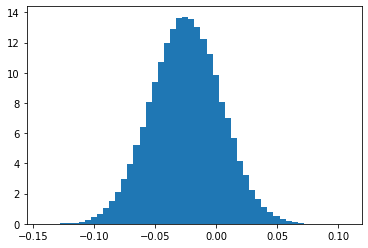

In [27]:
a1= np.random.beta(295,308, size = 100000)
a2= np.random.beta(289,333, size= 100000)
diff = a2 - a1 
plt.hist(diff, bins=50,density = True)
print('Posterior probability that there was a shift toward Bush : ' ,np.mean(diff>0))

##EX3
(a)

Data distirubution is = $p(y| \mu_c , \mu_t ,\sigma_c ^2, \sigma_t ^2  ) =  \Pi_{i=1} ^{32} N(y_ci |\mu_c ,\sigma_c ^2) \Pi_{i=1} ^{36} N(y_ti |\mu_t ,\sigma_t ^2) $

Because Prior is assumed uniform, 

$p(\mu_c, \mu_t, \sigma^2_c , \sigma_t^2 |y) \propto p(y| \mu_c , \mu_t ,\sigma_c ^2, \sigma_t ^2  ) p(\mu_c, \mu_t, \sigma_c^2 , \sigma_t ^2 )$

$\quad\quad\quad\quad\quad\quad\quad \propto p(y| \mu_c , \mu_t ,\sigma_c ^2, \sigma_t ^2  )$

$\therefore  p(\mu_c, \mu_t, \sigma^2_c , \sigma_t^2 |y) = \Pi_{i=1} ^{32} N(y_ci |\mu_c ,\sigma_c ^2) \Pi_{i=1} ^{36} N(y_ti |\mu_t ,\sigma_t ^2)$


$\;\;\;\;\;\;\;\;\;\;\;\;\qquad \qquad \quad \;\;= p(\mu_c , log \sigma_c |y) p(\mu_t , lop \sigma_t |y )  $

Because two posteriors for $(\mu_c ,log \sigma_c ) , (\mu_t , lo \sigma_t )$ are  independent,

$\mu_c |y \quad \sim \quad t_31(1.013 , 0.24 ^2 / 32) $

$\mu_t |y \quad \sim \quad t_31(1.173 , 0.20 ^2 / 36 )$

-

95% propbability interval for diff : [ 0.051232466764611836 , 0.270566676420395 ]


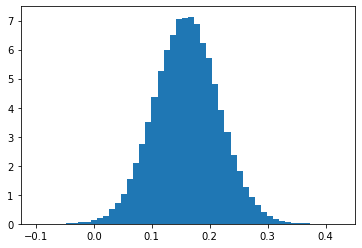

In [28]:
#(b)

a1= np.random.standard_t(df=31, size = 100000) *(0.24 / np.sqrt(32)) +1.013
a2= np.random.standard_t(df=35, size= 100000) *(0.20 / np.sqrt(36)) +1.173
diff = a2 - a1 
plt.hist(diff, bins=50,density = True)
print('95% propbability interval for diff : [' , np.percentile(diff,2.5) , ',', np.percentile(diff, 97.5), ']')

##EX4
(a)
Because data is binomial, use beta prior - uniform 

$\begin{align} p(p_0, p_1 |y) \\ \\ \\ \end{align} $$\begin{align} & \propto p(y|p_0 ,p_1 ) p(p_0, p_1 ) \\
& \propto p_0^{39} (1-p_0 )^{635} p_1 ^{22} (1-p_1 ) ^{658} \\ 
&\propto p(p_0|y ) p(p_1|y)  \end{align}$

Therefore

$p_0 |y \quad \sim \quad beta(40,636)$

$p_1 |y \quad \sim \quad beta(23,659)$

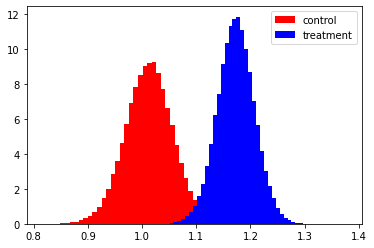

In [29]:
p0= np.random.beta(40,636, size = 100000)
p1= np.random.beta(23,659, size= 100000)

plt.hist(a1, bins=50,density = True, color = 'r', label = 'control')
plt.hist(a2, bins=50,density = True, color = 'b', label = 'treatment')
plt.legend()
plt.show()

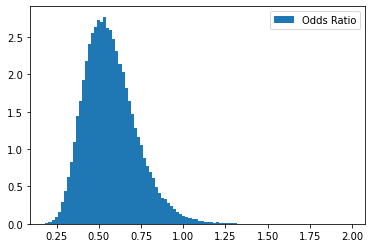

95% propbability interval for odds ratio : [ 0.3187136075120798 , 0.9241170347665616 ]


In [30]:
#(b)
OR = (p1 / (1-p1)) / (p0 / (1-p0))
plt.hist(OR, bins = 100, density = True, label = 'Odds Ratio')
plt.legend()
plt.show()
print('95% propbability interval for odds ratio : [' , np.percentile(OR,2.5) , ',', np.percentile(OR, 97.5), ']')

We can conclude that treatment works, because the ratio is on average below 1

(c)

As discussed in HW2, Prior affects the result a lot.

Suppose prior for $p_1$follows $\sim beta(1,1000)$. It means that prior belief of effect of treatment is large. If we draw the histogram, 

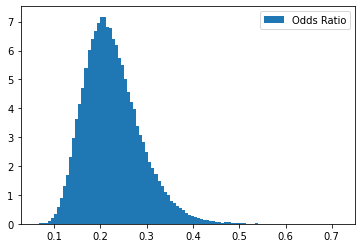

95% propbability interval for odds ratio : [ 0.12764666948300266 , 0.36625788387188424 ]


In [31]:
p1= np.random.beta(23,659+999, size= 100000)
OR = (p1 / (1-p1)) / (p0 / (1-p0))
plt.hist(OR, bins = 100, density = True, label = 'Odds Ratio')
plt.legend()
plt.show()
print('95% propbability interval for odds ratio : [' , np.percentile(OR,2.5) , ',', np.percentile(OR, 97.5), ']')

The histogram itself moves to left more, which means the effect of treatment is stronger. 

##EX5

(a) assuming unrounded, 

Prior : $ \quad \quad \quad p(\mu,\sigma^2 )  \quad \propto  \sigma^{-2}$

Likelihood: $ \, \, \quad  p(y|\mu, \sigma ^2 ) \, \, \propto \Pi_{i=1}^{n} \left[\sqrt{ \frac{1}{2 \pi \sigma^2 }} exp{\frac{-(y_i -\mu)^2}{2 \sigma^2 }} \right]$

Poesterior: $ \quad \,\, p(\mu, \sigma^2 |y) \, \, \propto \sigma^{-n-2} exp({- \Sigma_{i=1}^n ( \frac{-(y_i -𝛍)^2}{2 \sigma^2 })})  $ 


(b) 

let $y_i $ be rounded one, $z_i$ be unorounded one, then,


$p(y_i =k |\mu , \sigma^2 ) = p( k-0.5 <z_i < k+0.5 | \mu , \sigma^2 ) $

Therefore

Prior : $ \quad \quad \quad p(\mu,\sigma^2 )  \quad \propto  \sigma^{-2}$

Likelihood: $ \, \, \quad  p(y|\mu, \sigma ^2 ) \, \, \propto \Pi_{i=1}^{n} \left[\Phi (\frac{y_i +0.5 -mu}{\sigma} - \Phi (\frac{y_i -0.5 -\mu }{\sigma }) \right]$

Poesterior: $ \quad \,\, p(\mu, \sigma^2 |y) \, \, \propto \sigma^{-n-2} \Pi_{i=1}^{n} \left[\Phi (\frac{y_i +0.5 -mu}{\sigma} - \Phi (\frac{y_i -0.5 -\mu }{\sigma }) \right]$  

, where $\Phi$ means cdf for standard normal



In [ ]:
#(c)

#Input the given data
y = np.array([10,10,12,11,9])
n = len(y)
s2 = np.var(y, ddof=1) 
ybar = np.mean(y)

#grid
mu = np.linspace(3,18,200)
sd = np.linspace(-2,4,200)
contours = [0.0001,0.001,0.01, 0.1, 0.25, 0.5 ,0.75,0.95]

#den
posta = np.exp((np.log(stats.norm.pdf(y[0], loc = mu, scale = np.exp(sd)[:,np.newaxis]))
 +np.log(stats.norm.pdf(y[1], loc = mu, scale = np.exp(sd)[:,np.newaxis]))
 +np.log(stats.norm.pdf(y[2], loc = mu, scale = np.exp(sd)[:,np.newaxis]))
 +np.log(stats.norm.pdf(y[3], loc = mu, scale = np.exp(sd)[:,np.newaxis]))
 +np.log(stats.norm.pdf(y[4], loc = mu, scale = np.exp(sd)[:,np.newaxis])))
 - 
 np.max(
     (np.log(stats.norm.pdf(y[0], loc = mu, scale = np.exp(sd)[:,np.newaxis]))
 +np.log(stats.norm.pdf(y[1], loc = mu, scale = np.exp(sd)[:,np.newaxis]))
 +np.log(stats.norm.pdf(y[2], loc = mu, scale = np.exp(sd)[:,np.newaxis]))
 +np.log(stats.norm.pdf(y[3], loc = mu, scale = np.exp(sd)[:,np.newaxis]))
 +np.log(stats.norm.pdf(y[4], loc = mu, scale = np.exp(sd)[:,np.newaxis])))))

postb = np.exp((np.log(stats.norm.cdf(y[0]+0.5, loc = mu, scale = np.exp(sd)[:,np.newaxis])
- stats.norm.cdf(y[0]-0.5, loc = mu, scale = np.exp(sd)[:,np.newaxis]))
 +np.log(stats.norm.cdf(y[1]+0.5, loc = mu, scale = np.exp(sd)[:,np.newaxis])
 - stats.norm.cdf(y[1]-0.5, loc = mu, scale = np.exp(sd)[:,np.newaxis]))
 +np.log(stats.norm.cdf(y[2]+0.5, loc = mu, scale = np.exp(sd)[:,np.newaxis])
 - stats.norm.cdf(y[2]-0.5, loc = mu, scale = np.exp(sd)[:,np.newaxis]))
 +np.log(stats.norm.cdf(y[3]+0.5, loc = mu, scale = np.exp(sd)[:,np.newaxis])
 - stats.norm.cdf(y[3]-0.5, loc = mu, scale = np.exp(sd)[:,np.newaxis]))
 +np.log(stats.norm.cdf(y[4]+0.5, loc = mu, scale = np.exp(sd)[:,np.newaxis])
 - stats.norm.cdf(y[4]-0.5, loc = mu, scale = np.exp(sd)[:,np.newaxis]))
 - 
 np.max(
     np.log(stats.norm.cdf(y[0]+0.5, loc = mu, scale = np.exp(sd)[:,np.newaxis])
     - stats.norm.cdf(y[0]-0.5, loc = mu, scale = np.exp(sd)[:,np.newaxis]))
 +np.log(stats.norm.cdf(y[1]+0.5, loc = mu, scale = np.exp(sd)[:,np.newaxis])
 - stats.norm.cdf(y[1]-0.5, loc = mu, scale = np.exp(sd)[:,np.newaxis]))
 +np.log(stats.norm.cdf(y[2]+0.5, loc = mu, scale = np.exp(sd)[:,np.newaxis])
 - stats.norm.cdf(y[2]-0.5, loc = mu, scale = np.exp(sd)[:,np.newaxis]))
 +np.log(stats.norm.cdf(y[3]+0.5, loc = mu, scale = np.exp(sd)[:,np.newaxis])
 - stats.norm.cdf(y[3]-0.5, loc = mu, scale = np.exp(sd)[:,np.newaxis]))
 +np.log(stats.norm.cdf(y[4]+0.5, loc = mu, scale = np.exp(sd)[:,np.newaxis])
 - stats.norm.cdf(y[4]-0.5, loc = mu, scale = np.exp(sd)[:,np.newaxis])))))

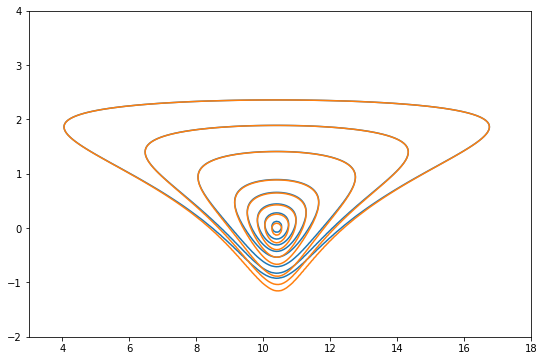

In [ ]:
# Figure setting
fig, axes = plt.subplots(
    1, 1,
    figsize=(9, 6),
    gridspec_kw=dict(
))


line1 = axes.contour(mu, sd,  posta, contours,  colors='C0')
line2 = axes.contour(mu, sd,  postb, contours,  colors='C1')


Makes difference at the corner

In [ ]:
#unrounded 
std = np.sqrt((n-1)*s2/(stats.chi2.rvs(4,size = 2000)))
muu = stats.norm.rvs(size = 2000, loc = ybar, scale = (std/np.sqrt(n)))

pd.DataFrame([[np.round(np.mean(muu),2) ,np.round(np.var(muu,ddof=1),2),np.round(np.percentile(muu, [2.5,25,50,75,97.5]),2)  ],[np.round(np.mean(std),2) ,np.round(np.var(std,ddof=1),2),np.round(np.percentile(std, [2.5,25,50,75,97.5]),2)  ]]
             , index = ['mu', 'sigma'], columns = ['mean', 'sd','2.5%,25%,50%,75%,97.5%' ])

,mean,sd,"2.5%,25%,50%,75%,97.5%"
mu,10.39,0.49,"[9.01, 10.0, 10.38, 10.75, 11.77]"
sigma,1.41,0.51,"[0.68, 0.96, 1.24, 1.65, 3.31]"


In [ ]:
#rounded
dens_mu = np.sum(postb, axis=0 )
de = []
for i in range(len(dens_mu)):
  de.append(dens_mu[i]/np.sum(dens_mu))
muindex = np.random.choice(range(len(mu)), size = 2000, replace = True, p = de )
muu = mu[muindex]
std= []
for i in range(2000):
  dee=[]
  for j in range(len(postb[muindex[i],])):
    dee.append(postb[:,muindex[i]][j]/np.sum(postb[:,muindex[i]]))
  std.append(np.exp(np.random.choice(sd,size=1, p = dee)))

pd.DataFrame([[np.round(np.mean(muu),2) ,np.round(np.var(muu,ddof=1),2),np.round(np.percentile(muu, [2.5,25,50,75,97.5]),2)  ],[np.round(np.mean(std),2) ,np.round(np.var(std,ddof=1),2),np.round(np.percentile(std, [2.5,25,50,75,97.5]),2)  ]]
             , index = ['mu', 'sigma'], columns = ['mean', 'sd','2.5%,25%,50%,75%,97.5%' ])



,mean,sd,"2.5%,25%,50%,75%,97.5%"
mu,10.40,0.49,"[9.03, 10.09, 10.39, 10.76, 11.74]"
sigma,1.36,0.53,"[0.61, 0.93, 1.19, 1.6, 3.21]"


mu: Does not make big difference


sigma: little bit of difference at lower quantile



In [ ]:
#(d)
z = []
sttd = [element for array in std for element in array]
for i in range(len(y)):
  lower = stats.norm.cdf(y[i]-0.5, loc = muu, scale = sttd)
  upper = stats.norm.cdf(y[i]+0.5, loc = muu, scale = sttd)
  z.append(stats.norm.ppf( lower + np.random.uniform(size= 2000) * (upper - lower), loc = muu, scale = sttd))

print( 'the answer for mean of (z_1 - z_@2)^2  :',np.mean((z[0]-z[1])**2))

the answer for mean of (z_1 - z_@2)^2  : 0.15608608993411083


##2. Normal model with unknown means and variances
I referenced https://github.com/avehtari/BDA_py_demos/blob/master/demos_ch3/demo3_1-4.ipynb : Demo from BDA3 webpage

for noninformative prior use

$p(\mu ,\sigma^2 ) \propto \sigma^-2  $ $\quad\quad or$ prior on ($\mu,  log \sigma$) is uniform

with data follows normal likelihood. 

Then, by factorization,

$p(\mu ,\sigma^2 |y) =  p(\mu | \sigma^2 ,y) p(\sigma^2 |y)$

Then, from the lecture we learnt that

$p(\mu|\sigma^2 , y) \propto N( \overline{y}. \frac{\sigma^2}{n} )$

$\sigma^2 |y \propto inv-\chi^2 (n-1, s^2)$

$\mu|y \propto t_{n-1} (\overline{y}. \frac{\sigma^2}{n} )$

$\tilde{y} |y \propto t_{n-1} (\overline{y}. (1+ \frac{1}{n})\sigma^2)$

We know the exact form from the class. However, following the demo, I will use sampling method.




In [33]:
#Input the given data
y = np.array([93, 112, 122, 135, 122, 150, 118, 90, 124, 114])
n = len(y)
s2 = np.var(y, ddof=1) 
my = np.mean(y)

In [34]:
# set random number generator with seed
rng = np.random.RandomState(seed=0)

At first, sample from $inv-\chi^2$ :$\sigma^2 |y \propto inv-\chi^2 (n-1, s^2)$


* If $x \sim chi^2 (\nu)$->$ \frac{1}{x} \sim inv-\chi^2 (\nu) $  , $\frac{\tau^2}{x} \sim inv-\chi^2 (\nu, \tau)$

In [35]:
# sample from p(sigma2|y)
sigma2 = sinvchi2.rvs(n-1, s2, size=1000, random_state=rng)

from normal  : $p(\mu|\sigma^2 , y) \propto N( \overline{y}. \frac{\sigma^2}{n} )$

In [36]:
# sample from p(mu|sigma2,y) 
mu = my + np.sqrt(sigma2/n)*rng.randn(*sigma2.shape)

Finally, sample $\tilde{y} |y \propto t_{n-1} (\overline{y}. (1+ \frac{1}{n})\sigma^2)$

In [37]:
# display sigma instead of sigma2
sigma = np.sqrt(sigma2)
# sample from the predictive distribution p(ynew|y)
# for each sample of (mu, sigma)
ynew = rng.randn(*mu.shape)*sigma + mu

with generated parameters, we could approximate posterior and predictive

In [38]:
# for mu compute the density in these points
tl1 = [90, 150]
t1 = np.linspace(tl1[0], tl1[1], 1000)
# for sigma compute the density in these points
tl2 = [10, 60]
t2 = np.linspace(tl2[0], tl2[1], 1000)
# for ynew compute the density in these points
tlynew = [50, 185]
xynew = np.linspace(tlynew[0], tlynew[1], 1000)

# evaluate the joint density in a grid
# made 2-dimensional to use it for contouring
Z = stats.norm.pdf(t1, loc = my, scale = t2[:,np.newaxis]/np.sqrt(n))
Z *= (sinvchi2.pdf(t2**2, n-1, s2)*2*t2)[:,np.newaxis]

In [55]:
np.linspace(1e-5, Z.max(), 6)[:-1]

array([1.00000000e-05, 2.52391432e-02, 5.04682864e-02, 7.56974296e-02,
       1.00926573e-01])

In [54]:
np.linspace(1e-5, Z.max(), 6)

array([1.00000000e-05, 2.52391432e-02, 5.04682864e-02, 7.56974296e-02,
       1.00926573e-01, 1.26155716e-01])

generate exact distirution made analytically and approximation by kernel marignal mu :$\mu|y \propto t_{n-1} (\overline{y}. \frac{\sigma^2}{n} )$

In [39]:
# compute the exact marginal density for mu. It is from the distribtuion above
pm_mu = stats.t.pdf((t1 - my) / np.sqrt(s2/n), n-1) / np.sqrt(s2/n)

# estimate the marginal density for mu using samples and an ad hoc Gaussian Kernel
# kernel approximation
pk_mu = stats.gaussian_kde(mu).evaluate(t1)


generate exact distirution made analytically and approximattionm by kernel marignal sigma:$\sigma^2 |y \propto inv-\chi^2 (n-1, s^2)$

In [40]:
# compute the exact marginal density for sigma
pm_sigma = sinvchi2.pdf(t2**2, n-1, s2)*2*t2
# N.B. this was already calculated in the joint distribution case

# estimate the marginal density for sigma using samples and an ad hoc Gaussian
# kernel approximation
pk_sigma = stats.gaussian_kde(sigma).evaluate(t2)

Finally, Predictive

In [41]:
# compute the exact predictive density
p_new = stats.t.pdf((xynew-my)/np.sqrt(s2*(1+1/n)), n-1) / np.sqrt(s2*(1+1/n))


##Visualizing the distribution

Set figure

Joint and marginal posterior distributions


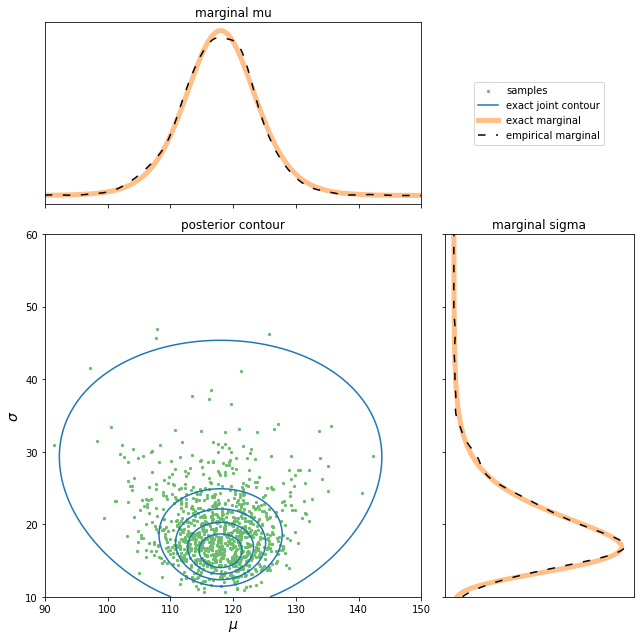

In [42]:
print('Joint and marginal posterior distributions')

# Figure setting
fig, axes = plt.subplots(
    2, 2,
    figsize=(9, 9),
    gridspec_kw=dict(
        width_ratios=[2, 1],
        height_ratios=[1, 2]
    )
)

#왼쪽 아래 
#at left below, draw the exact joint posterior contour.
ax = axes[1, 0]

# plot the samples from the joint posterior( x axis: mu, y axis : sigma)
samps = ax.scatter(mu, sigma, 5, color=plot_tools.lighten('C2', 0.3))

# plot the contour plot of the exact posterior 
c_levels = np.linspace(1e-5, Z.max(), 6)[:-1]
ax.contour(t1, t2, Z, c_levels, colors='C0')
# decorate
ax.set_title('posterior contour')
ax.set_xlim(tl1)
ax.set_ylim(tl2)
ax.set_xlabel('$\mu$', fontsize='14')
ax.set_ylabel('$\sigma$', fontsize='14')

#왼쪽 위
#top left is for marginal of mu. draw both exact and approximate ones

# plot the marginal of mu
ax = axes[0, 0]
# exact
ax.plot(
    t1,
    pm_mu,
    color=plot_tools.lighten('C1'),
    linewidth=5
)
# empirical
ax.plot(
    t1,
    pk_mu,
    color='k',
    dashes=(5, 7),
    linewidth=1.5
)
# decorate
ax.set_title('marginal mu')
ax.set_xlim(tl1)
ax.set_yticks(())
ax.set_xticklabels(())

#아래 오른
#bottom right  is for marginal of mu. draw both exact and approximate ones
# plot the marginal of sigma
ax = axes[1, 1]
# exact
exact_line, = ax.plot(
    pm_sigma,
    t2,
    color=plot_tools.lighten('C1'),
    linewidth=5
)
# empirical
empirical_line, = ax.plot(
    pk_sigma,
    t2,
    color='k',
    dashes=(5, 7),
    linewidth=1.5
)
# decorate
ax.set_title('marginal sigma')
ax.set_ylim(tl2)
ax.set_xticks(())
ax.set_yticklabels(())

# hide last ax
ax = axes[0, 1]
ax.axis('off')
# make legend there
ax.legend(
    (
        samps,
        plt.Line2D([], [], color='C0'),
        exact_line,
        empirical_line
    ),
    (
        'samples',
        'exact joint contour',
        'exact marginal',
        'empirical marginal'
    ),
    loc='center',
)

fig.tight_layout()


##Visualise factored sampling and the corresponding marginal and conditional densities

We know from factiorisation,

$p(\mu , \sigma^2 |y) = p(\mu |\sigma^2 ,y) p(\sigma^2 |y) $

plot mariginal dist of sigma and conditional dist of mu and join it.

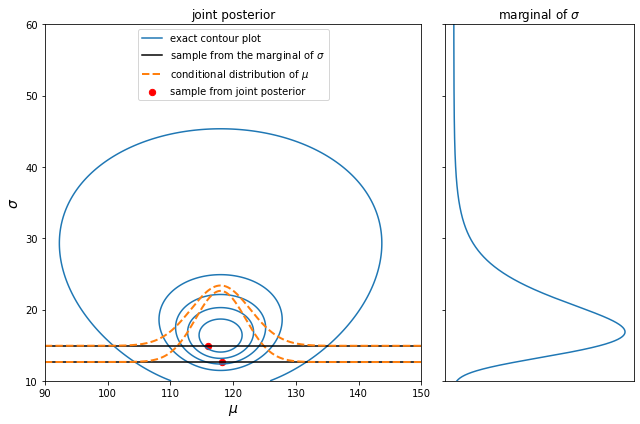

In [43]:
# create figure
fig, axes = plt.subplots(
    1, 2,
    figsize=(9, 6),
    gridspec_kw=dict(width_ratios=[2, 1])
)

#왼쪽
# plot the joint distribution
ax = axes[0]
# plot the contour plot of the exact posterior (c_levels is used to give
# a vector of linearly spaced values at which levels contours are drawn)
c_levels = np.linspace(1e-5, Z.max(), 6)[:-1]
ax.contour(t1, t2, Z, c_levels, colors='C0')


# plot the first sample
# draw the marginal mu based on given one sigma
# I put one more sigma, 600th for more graphic
line1, = ax.plot(tl1, [sigma[0], sigma[0]], 'k')
line2, = ax.plot(
    t1,
    sigma[0] + stats.norm.pdf(t1, my, np.sqrt(sigma2[0]/n))*100,
    color='C1',
    linestyle='dashed',
    linewidth=2
)
scat = ax.scatter(mu[0], sigma[0], 40, color='r')

line3, = ax.plot(tl1, [sigma[600], sigma[600]], 'k')
line4, = ax.plot(
    t1,
    sigma[600] + stats.norm.pdf(t1, my, np.sqrt(sigma2[600]/n))*100,
    color='C1',
    linestyle='dashed',
    linewidth=2
)
scat = ax.scatter(mu[600], sigma[600], 40, color='r')

# decorate
ax.set_xlim(tl1)
ax.set_ylim(tl2)
ax.set_xlabel('$\mu$', fontsize=14)
ax.set_ylabel('$\sigma$', fontsize=14)
ax.set_title('joint posterior')
ax.legend(
    (plt.Line2D([], [], color='C0'), line1, line2, scat),
    ('exact contour plot',
     'sample from the marginal of $\\sigma$',
     'conditional distribution of $\\mu$',
     'sample from joint posterior'),
    loc='upper center'
)

#오른쪽
# plot the marginal of sigma
ax = axes[1]
ax.plot(pm_sigma, t2)
# decorate
ax.set_ylim(tl2)
ax.set_title('marginal of $\sigma$')
ax.set_xticks(());
ax.set_yticklabels(())

fig.tight_layout()

## Visualise the marginal distribution of mu as a mixture of normals.

we know : $p(\mu|\sigma^2 , y) \propto N( \overline{y}. \frac{\sigma^2}{n} )$

From lots of sigmas, draw conditional $\mu$s

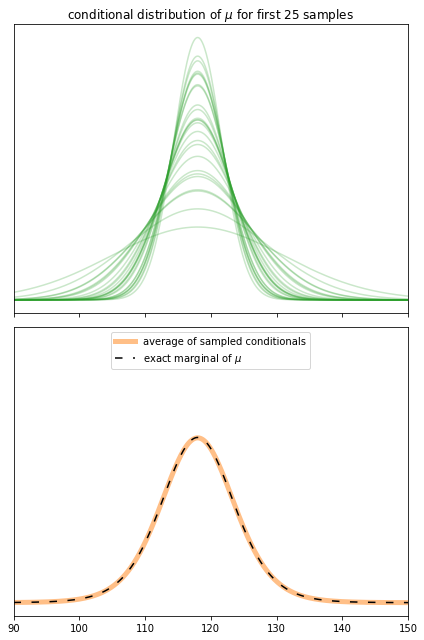

In [44]:
# calculate conditional pdfs for each sample
condpdfs = stats.norm.pdf(t1, my, np.sqrt(sigma2/n)[:,np.newaxis])

# create figure
fig, axes = plt.subplots(2, 1, figsize=(6, 9), sharex=True)

#위 
# conditional dist. for first 25 samples of sigmas
# plot some of them
ax = axes[0]
ax.plot(t1, condpdfs[:25].T, 'C2', alpha=0.25)
ax.set_xlim(tl1)
ylims_from_0 = ax.set_ylim()  # set same y_lims to the next plot
ax.set_title('conditional distribution of $\\mu$ for first 25 samples')
ax.set_yticks(())

#아래 
# plot their mean
ax = axes[1]
ax.plot(
    t1,
    np.mean(condpdfs, axis=0),
    color=plot_tools.lighten('C1'),
    linewidth=5,
    label='average of sampled conditionals'
)

#the real one
ax.plot(
    t1,
    pm_mu,
    color='k',
    dashes=(5, 7),
    linewidth=1.5,
    label='exact marginal of $\\mu$'
)
ax.set_yticks(())
ax.set_xlim(tl1)
ax.set_ylim(ylims_from_0)
ax.legend(loc='upper center')

fig.tight_layout()

## Visualise sampling from the posterior predictive distribution.

Visualise the final one : $\tilde{y} |y \propto t_{n-1} (\overline{y}. (1+ \frac{1}{n})\sigma^2)$

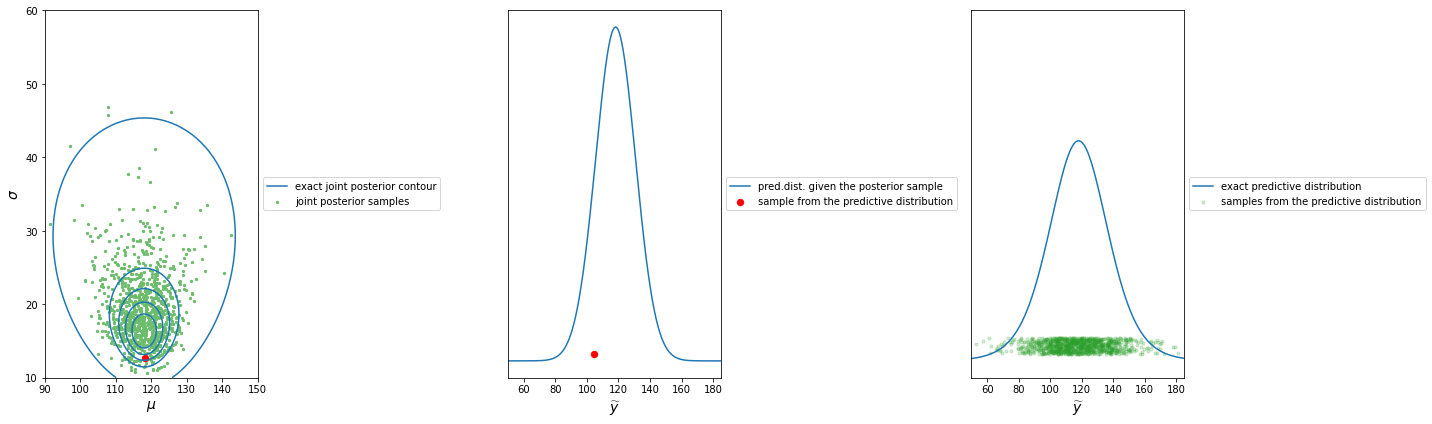

In [45]:
# calculate predictive pdf for the first given mu and sigma sample
ynewdists = stats.norm.pdf(xynew, mu[0], sigma[0])

# create figure
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

#첫번째
#Same with above
# plot the joint distribution
ax = axes[0]
# plot the samples from the joint posterior
samps = ax.scatter(mu, sigma, 5, color=plot_tools.lighten('C2', 0.3))
# plot the contour plot of the exact posterior (c_levels is used to give
# a vector of linearly spaced values at which levels contours are drawn)
c_levels = np.linspace(1e-5, Z.max(), 6)[:-1]
ax.contour(t1, t2, Z, c_levels, colors='C0')
# decorate
ax.set_xlim(tl1)
ax.set_ylim(tl2)
ax.set_xlabel('$\mu$', fontsize=14)
ax.set_ylabel('$\sigma$', fontsize=14)
ax.legend(
    (plt.Line2D([], [], color='C0'), samps),
    ('exact joint posterior contour', 'joint posterior samples'),
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
# highlight the first sample
ax.scatter(mu[0], sigma[0], 40, 'r')

# 두번째 : for one sample ; 
# plot first ynew
ax = axes[1]
# plot the distribution and the respective sample
line1, = ax.plot(xynew, ynewdists)
ax1_hs = ax.scatter(ynew[0], 0.02*np.max(ynewdists), 40, 'r')
# decorate
ylims_from_1 = ax.set_ylim()
ax.set_xlim(tlynew)
ax.set_xlabel('$\widetilde{y}$', fontsize=14)
ax.set_yticks(())
ax.legend(
    (line1, ax1_hs),
    ('pred.dist. given the posterior sample',
    'sample from the predictive distribution'),
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)
#세번째: exact posterior predictive for all samples.
# plot all ynews
ax = axes[2]
ax.scatter(
    ynew,
    (0.02 + 0.05*rng.rand(*ynew.shape))*np.max(ynewdists),
    10,
    color='C2',
    alpha=0.2,
    label='samples from the predictive distribution'
)
ax.plot(
    xynew,
    p_new,
    linewidth=1.5,
    label='exact predictive distribution'
)
ax.set_ylim(ylims_from_1)
ax.set_xlim(tlynew)
ax.set_xlabel('$\widetilde{y}$', fontsize=14)
ax.set_yticks(())
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()

## 3. Estimating the speed of light using normal model

based on : https://github.com/avehtari/BDA_py_demos/blob/master/demos_ch3/demo3_5.ipynb

In [ ]:
# edit default plot settings
plt.rc('font', size=12)
# apply custom background plotting style
plt.style.use(plot_tools.custom_styles['gray_background'])

Basic information for distribution:

$y_i |\mu, \sigma^2  \quad \sim \quad N(\mu, \sigma^2 ) , ~i \in [1,66]$

$\mu, \sigma^2 \propto (sigma^2 )^-1$

$\mu,\sigma^2 |y \quad \sim \quad N(\overline{y} , \frac{\sigma^2}{65})$

$\mu|y \quad \sim \quad t_{65} (\overline{y} , \frac{s^2}{65})$

$\sigma^2 |y \quad \sim \quad inv-\chi^2 (65, s^2 )$

load data form the site, then get sufficient statistics for original data and filtered(positive) datas

In [ ]:
# data is obtained from  the official site
y = np.loadtxt('/content/light.txt')

# sufficient statistics
n = len(y)
s2 = np.var(y, ddof=1)  # ddof=1 -> sample estimate
my = np.mean(y)

# filtered data (only positive values)
y_pos = y[y > 0]
# sufficient statistics
n_pos = len(y_pos)
s2_pos = np.var(y_pos, ddof=1)
my_pos = np.mean(y_pos)

get exact distribution for mu from the data. 

In [ ]:
# for mu, compute the density in these points
tl1 = [10, 40]
t1 = np.linspace(tl1[0], tl1[1], 100)

# compute the exact marginal density for mu
# multiplication by 1./sqrt(s2/n) is due to the transformation of variable
# z=(x-mean(y))/sqrt(s2/n), see BDA3 p. 21
pm_mu = stats.t.pdf((t1 - my) / np.sqrt(s2/n), n-1) / np.sqrt(s2/n)

# compute the exact marginal density for mu for the filtered data
pm_mu_pos = (
    stats.t.pdf((t1 - my_pos) / np.sqrt(s2_pos/n_pos), n_pos-1) /np.sqrt(s2_pos/n_pos))

Plot the graphs.

We get similar graphs from textbook.

Also, we can see exclusion of unusual data shift the distribution

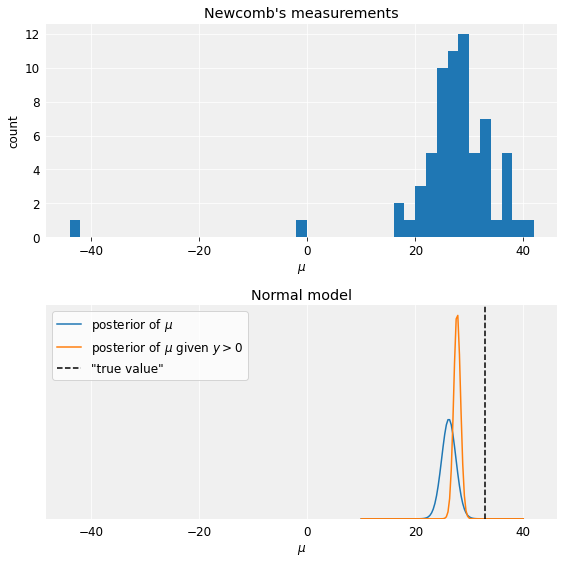

In [ ]:
# Plotting

# create figure
fig, axes = plt.subplots(2,1, sharex=True, figsize=(8,8))

# plot histogram
ax = axes[0]
ax.hist(y, np.arange(-44, 43, 2))
# decorate
ax.set_title('Newcomb\'s measurements')
ax.set_ylabel('count')
ax.set_xlabel('$\mu$')
ax.tick_params(axis='x', reset=True, top=False)

# plot the posterior of mu
ax = axes[1]
ax.plot(t1, pm_mu)
# plot the posterior of mu in the filtered case
ax.plot(t1, pm_mu_pos)
# Plot the currently accepted true value
ax.axvline(33, color='k', linestyle='--')
ax.legend(
    ('posterior of $\mu$',
     'posterior of $\mu$ given $y > 0$',
     '"true value"'),
    loc='upper left'
)
ax.set_title('Normal model')
ax.set_xlabel('$\mu$')
ax.set_yticks(())
# set bottom to zero
ax.set_ylim((0, ax.set_ylim()[1]))

fig.tight_layout()